In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.utils import to_categorical



Data Prepreation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [ ]:
categorical_y_train = to_categorical(y_train)
categorical_y_test = to_categorical(y_test)

In [ ]:
X_train.shape[0]

50000

Normalization

In [ ]:
from tensorflow.keras import *

Network = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
print(Network.summary())
Network.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss=losses.categorical_crossentropy, metrics=["accuracy"])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 128)               393344    
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
mean = np.mean(X_train, axis = (0,1,2))
std = np.std(X_train, axis = (0,1,2))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

In [ ]:
Train_Trace = Network.fit(X_train, categorical_y_train, validation_data=(X_test, categorical_y_test), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7238 - accuracy: 0.3923 - val_loss: 1.5679 - val_accuracy: 0.4433
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4999 - accuracy: 0.4758 - val_loss: 1.5028 - val_accuracy: 0.4701
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4051 - accuracy: 0.5080 - val_loss: 1.4747 - val_accuracy: 0.4827
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3375 - accuracy: 0.5329 - val_loss: 1.4543 - val_accuracy: 0.4848
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2804 - accuracy: 0.5517 - val_loss: 1.4217 - val_accuracy: 0.5001
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2331 - accuracy: 0.5676 - val_loss: 1.4303 - val_accuracy: 0.5026
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1907 - accuracy: 0.5853 - val_loss: 1.3982 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plotly
def graph_trace(trace):
  fig, (accuracy_plot, loss_plot) = plotly.subplots(1, 2, figsize=(10,10))
  accuracy_plot.set_title("Accuracy")
  accuracy_plot.set_xlabel("Epoch Number")
  accuracy_plot.set_ylabel("Accuracy")
  accuracy_plot.plot(trace.history['accuracy'], label="train")
  accuracy_plot.plot(trace.history['val_accuracy'], label="test")
  loss_plot.set_title("Loss")
  loss_plot.set_xlabel("Epoch Number")
  loss_plot.set_ylabel("Loss")
  loss_plot.plot(trace.history['loss'], label="train")
  loss_plot.plot(trace.history['val_loss'], label="test")


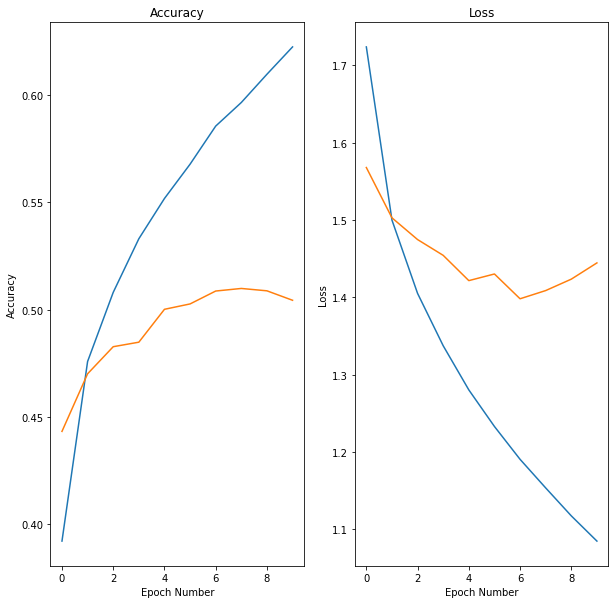

In [ ]:

graph_trace(Train_Trace)

In [ ]:
from sklearn.metrics import classification_report
def report(model,X_test, y_test, X_train, y_train):
  y_pred = model.predict(X_train)
  y_pred = np.argmax(y_pred, axis=1)
  print("======================Train Report========================")
  print(classification_report(y_train, y_pred))
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=1)
  print("======================Test Report========================")
  print(classification_report(y_test, y_pred))

In [ ]:
report(Network,X_test,y_test,X_train,y_train)


1563/1563 [==============================] - 2s 2ms/step
======================Train Report========================
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      5000
           1       0.72      0.81      0.76      5000
           2       0.69      0.34      0.45      5000
           3       0.53      0.42      0.47      5000
           4       0.61      0.54      0.57      5000
           5       0.49      0.64      0.56      5000
           6       0.58      0.78      0.66      5000
           7       0.76      0.70      0.73      5000
           8       0.67      0.80      0.73      5000
           9       0.73      0.69      0.71      5000

    accuracy                           0.64     50000
   macro avg       0.64      0.64      0.63     50000
weighted avg       0.64      0.64      0.63     50000

313/313 [==============================] - 0s 2ms/step
======================Test Report========================
            

# Effect of Epoch

THe count of epochs determines overfitting or underfitting.When the epoch count is low Neural Network fail to predict correctly.There is an optimal point where the epoch count provides the best accuracy , (any metric you like) without being overfit ,  high number of epochs leads to overfitting , that is when we start capturing noise and have reduced generalization.

Dealing with overfitting -> 
1. Early stopping 
2. Changes in the layer organization and architecture to reduce variance
3. Performing Dropouts
4. Reguralization 

In [ ]:
from tensorflow.keras import *

Second_Network = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
print(Second_Network.summary())
Second_Network.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss=losses.MSE, metrics=["accuracy"])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_30 (Dense)            (None, 128)               393344    
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________
None


# Using MSE for loss

In [ ]:
MSE_Train_History = Network.fit(X_train, categorical_y_train, validation_data=(X_test, categorical_y_test), epochs=10, batch_size=32)


Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8787 - accuracy: 0.6919 - val_loss: 1.5235 - val_accuracy: 0.5134
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8569 - accuracy: 0.7032 - val_loss: 1.5666 - val_accuracy: 0.5048
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8361 - accuracy: 0.7065 - val_loss: 1.6096 - val_accuracy: 0.4963
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8179 - accuracy: 0.7133 - val_loss: 1.6343 - val_accuracy: 0.4967
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7962 - accuracy: 0.7227 - val_loss: 1.6367 - val_accuracy: 0.5054
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7805 - accuracy: 0.7262 - val_loss: 1.6743 - val_accuracy: 0.5045
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7618 - accuracy: 0.7327 - val_loss: 1.6537 - val_accuracy:

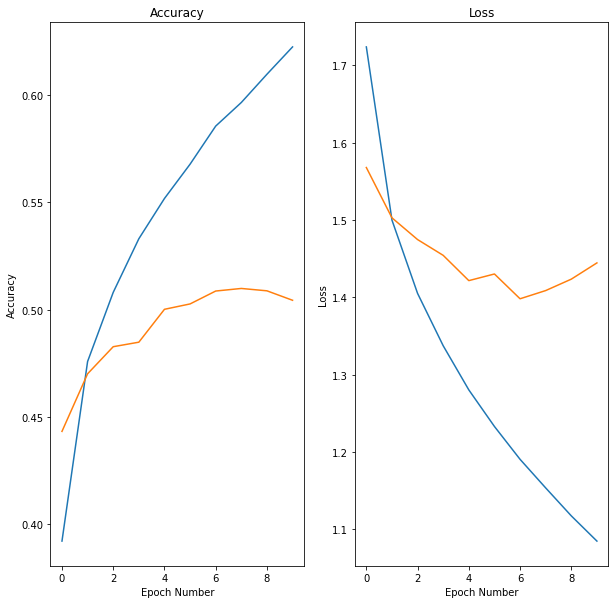

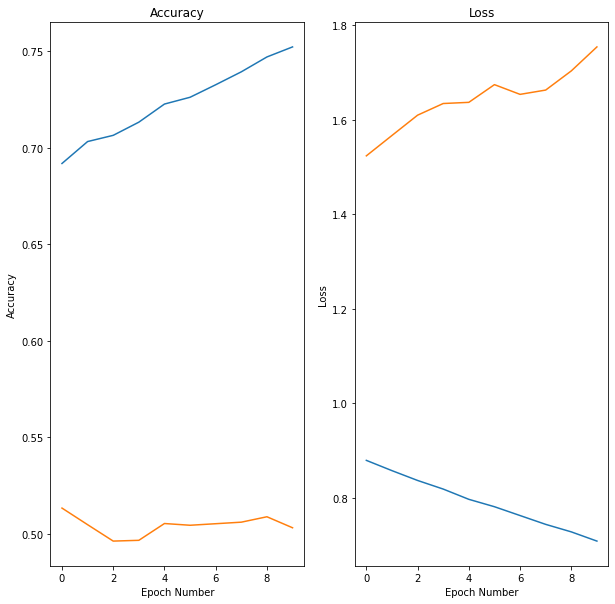

In [ ]:
graph_trace(Train_Trace)
graph_trace(MSE_Train_History)

In [ ]:
report(Network,X_test,y_test,X_train,y_train)
report(Second_Network,X_test,y_test,X_train,y_train)


1563/1563 [==============================] - 2s 2ms/step
======================Train Report========================
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      5000
           1       0.87      0.86      0.87      5000
           2       0.74      0.63      0.68      5000
           3       0.67      0.61      0.64      5000
           4       0.66      0.79      0.72      5000
           5       0.71      0.71      0.71      5000
           6       0.80      0.82      0.81      5000
           7       0.86      0.85      0.86      5000
           8       0.89      0.78      0.83      5000
           9       0.79      0.89      0.84      5000

    accuracy                           0.77     50000
   macro avg       0.78      0.77      0.77     50000
weighted avg       0.78      0.77      0.77     50000

313/313 [==============================] - 1s 2ms/step
======================Test Report========================
            

MSE presumes the data is sampled from normally distributed original data  In Bayesian terms this means we assume a Gaussian prior, obviously a 10 class data set might not be normally distrubted , thats why Binary Cross-Entropy Loss Function   is created , we can clearly see that using MSE made the model not progress (back propagation is not working correctly) , the final accuracy is not that different (probably because the NN architecture is not perfect and should includes CNNs for photo processing , but MSE seems to overfit much more quickly than Cross Entropy Validation
Generally we use MSE for Regressions and when Gaussian prior assumption is logical , note that because the weights are sampled randomly , the initial start accuracy of the MSE might be better in some runs  , but it does not get better as fast as the cross validation entropy does , 